# Introduction to Scikit Learn (SkLearn)


0. An end-to-end Scikit-Learn workflow
1. Getting the data ready
2. Choose the right estimator/algorithm for our problems
3. Fit the model/algorithm and use it to make predictions on our data
4. Evaluate a model
5. Improve a model
6. Save and load a trained model
7. Putting it all together

## 0. An end-to-end Scikit-Learn workflow

In [1]:
#get the data ready
import numpy as np
import pandas as pd
heart_disease = pd.read_csv("heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [2]:
# create features matrix
X = heart_disease.drop("target", axis=1)

# create y-label
y = heart_disease["target"]

In [3]:
# 2. Choose the right estimator/algorithm for our problems

from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100)

# We'll keep the default hyperparameter

clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [4]:
# 3. Fit the model to the training data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [5]:
clf.fit(X_train, y_train);

In [6]:
# make a prediction

y_preds = clf.predict(X_test)
y_preds

array([0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0], dtype=int64)

In [7]:
y_test

290    0
282    0
217    0
73     1
167    0
      ..
37     1
267    0
10     1
223    0
150    1
Name: target, Length: 61, dtype: int64

In [8]:
# 4. Evaluate the model

clf.score(X_train, y_train)

1.0

In [9]:
clf.score(X_test, y_test)

0.8360655737704918

In [10]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.92      0.73      0.81        30
           1       0.78      0.94      0.85        31

    accuracy                           0.84        61
   macro avg       0.85      0.83      0.83        61
weighted avg       0.85      0.84      0.83        61



In [11]:
confusion_matrix(y_test, y_preds)

array([[22,  8],
       [ 2, 29]], dtype=int64)

In [12]:
accuracy_score(y_test, y_preds)

0.8360655737704918

In [13]:
# 5. improve the model

# try different amount of n_estimators

np.random.seed(42)

for i in range(10, 100, 10):
    print(f"Trying model with {i} estimators:")
    clf = RandomForestClassifier(n_estimators=i).fit(X_train, y_train)
    print(f"Model accruacy on test set: {clf.score(X_test, y_test)}")
    


Trying model with 10 estimators:
Model accruacy on test set: 0.7868852459016393
Trying model with 20 estimators:
Model accruacy on test set: 0.8032786885245902
Trying model with 30 estimators:
Model accruacy on test set: 0.819672131147541
Trying model with 40 estimators:
Model accruacy on test set: 0.7704918032786885
Trying model with 50 estimators:
Model accruacy on test set: 0.8032786885245902
Trying model with 60 estimators:
Model accruacy on test set: 0.7868852459016393
Trying model with 70 estimators:
Model accruacy on test set: 0.7868852459016393
Trying model with 80 estimators:
Model accruacy on test set: 0.819672131147541
Trying model with 90 estimators:
Model accruacy on test set: 0.819672131147541


In [14]:
# 6. Save and load a trained model

import pickle 

pickle.dump(clf, open("random_forest_model_1.pkl", "wb"))

In [15]:
loaded_model = pickle.load(open("random_forest_model_1.pkl", "rb"))
loaded_model.score(X_test, y_test)

0.819672131147541

## 1. Getting our data ready to be used with machine learning

In [16]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [17]:
X = heart_disease.drop("target", axis=1)

In [18]:
y = heart_disease["target"]

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [20]:
# making sure it's all numerical

car_sales = pd.read_csv("car-sales-extended.csv")
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [21]:
len(car_sales)

1000

In [22]:
# split the data 

X = car_sales.drop("Price", axis=1)
y= car_sales["Price"]


#split into training and test data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [23]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)
model_score(X_test, y_test)

ValueError: could not convert string to float: 'Toyota'

In [26]:
# Turn the categories (Make and Colour) into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", 
                                 one_hot, 
                                 categorical_features)],
                                 remainder="passthrough")
transformed_X = transformer.fit_transform(X)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [27]:
transformed_X[0]


array([0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
       1.0000e+00, 0.0000e+00, 3.5431e+04])

In [28]:
X.iloc[0]


Make             Honda
Colour           White
Odometer (KM)    35431
Doors                4
Name: 0, dtype: object

In [29]:
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [ ]:
# Let's refit the model
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(transformed_X,
                                                    y,
                                                    test_size=0.2)

model.fit(X_train, y_train);

In [ ]:
model.score(X_test, y_test)

# Missing Data

* imputation = filling with some value
* removing the samples with missing data altogether

In [ ]:
car_sales_missing = pd.read_csv("car-sales-extended-missing-data.csv")
car_sales_missing.head()

In [ ]:
car_sales_missing.isna().sum()

In [ ]:
X = car_sales_missing.drop("Price", axis=1)

y = car_sales_missing["Price"]

In [ ]:
# Turn the categories (Make and Colour) into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", 
                                 one_hot, 
                                 categorical_features)],
                                 remainder="passthrough")
transformed_X = transformer.fit_transform(X)
transformed_X

### Option 1: Fill missing data using Pandas

In [ ]:
#fill the make column

car_sales_missing["Make"].fillna("missing", inplace=True)

In [ ]:
car_sales_missing["Colour"].fillna("missing", inplace=True)

In [ ]:
car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean(), inplace=True)

In [ ]:
car_sales_missing["Doors"].fillna(4, inplace=True)

In [ ]:
car_sales_missing.isna().sum()

In [ ]:
#remove rows wih mssing Price value

car_sales_missing.dropna(inplace=True)

In [ ]:
car_sales_missing.isna().sum()

In [ ]:
len(car_sales_missing)

In [ ]:
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

In [ ]:
# Turn the categories (Make and Colour) into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", 
                                 one_hot, 
                                 categorical_features)],
                                 remainder="passthrough")
transformed_X = transformer.fit_transform(car_sales_missing)
transformed_X

### Option 2: Fill missing values with Scikit-Learn

In [ ]:
car_sales_missing = pd.read_csv("car-sales-extended-missing-data.csv")
car_sales_missing.head()

In [ ]:
car_sales_missing.isna().sum()

In [ ]:
# Drop the rows with no labels
car_sales_missing.dropna(subset=["Price"], inplace=True)
car_sales_missing.isna().sum()

In [ ]:

# Split into X & y
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

# Split data into train and test
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)

In [ ]:
# Check missing values
X.isna().sum()

In [ ]:
# Fill missing values with Scikit-Learn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Fill categorical values with 'missing' & numerical values with mean
cat_imputer = SimpleImputer(strategy="constant", fill_value="missing")
door_imputer = SimpleImputer(strategy="constant", fill_value=4)
num_imputer = SimpleImputer(strategy="mean")

# Define columns
cat_features = ["Make", "Colour"]
door_feature = ["Doors"]
num_features = ["Odometer (KM)"]

# Create an imputer (something that fills missing data)
imputer = ColumnTransformer([
    ("cat_imputer", cat_imputer, cat_features),
    ("door_imputer", door_imputer, door_feature),
    ("num_imputer", num_imputer, num_features)
])

# Fill train and test values separately
filled_X_train = imputer.fit_transform(X_train)
filled_X_test = imputer.transform(X_test)

# Check filled X_train
filled_X_train

In [ ]:
# Get our transformed data array's back into DataFrame's
car_sales_filled_train = pd.DataFrame(filled_X_train, 
                                      columns=["Make", "Colour", "Doors", "Odometer (KM)"])

car_sales_filled_test = pd.DataFrame(filled_X_test, 
                                     columns=["Make", "Colour", "Doors", "Odometer (KM)"])

In [ ]:
car_sales_filled_train.isna().sum()

In [ ]:
car_sales_filled_test.isna().sum()

In [ ]:
car_sales_missing.isna().sum()

In [ ]:
# Now let's one hot encode the features with the same code as before 
categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", 
                                 one_hot, 
                                 categorical_features)],
                                 remainder="passthrough")

# Fill train and test values separately
transformed_X_train = transformer.fit_transform(car_sales_filled_train)
transformed_X_test = transformer.transform(car_sales_filled_test)

# Check transformed and filled X_train
transformed_X_train.toarray()

In [ ]:
# Now we've transformed X, let's see if we can fit a model
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()

# Make sure to use transformed (filled and one-hot encoded X data)
model.fit(transformed_X_train, y_train)
model.score(transformed_X_test, y_test)

In [ ]:
# Check length of transformed data (filled and one-hot encoded)
# vs. length of original data
len(transformed_X_train.toarray())+len(transformed_X_test.toarray()), len(car_sales)

## 2. Choosing the right estimator/algorithm for our problem

Some things to note:

* Sklearn refers to machine learning models/algorithms as estimators

<img src="ml_map.png" alt="Machine Learning Map" />

## 2.1 Picking a model for regression problem

In [ ]:
#Get California Housing dataset

from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()

In [ ]:
housing

In [ ]:
housing_df = pd.DataFrame(housing["data"], columns = housing["feature_names"])
housing_df

In [ ]:
housing_df["MedHouseVal"] = housing["target"]
housing_df.head()

In [ ]:
# MedHouseVal is the target

np.random.seed(42)

# import an algorithm/estimator

from sklearn.linear_model import Ridge

# create the data

X = housing_df.drop("MedHouseVal", axis= 1)
y= housing_df["MedHouseVal"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)


# instantiate and fit the model (on the training set)

model = Ridge()
model.fit(X_train, y_train)

# check the score of the model on test set

model.score(X_test, y_test)


In [ ]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = housing_df.drop("MedHouseVal", axis= 1)
y= housing_df["MedHouseVal"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)


# instantiate and fit the model (on the training set)

model = RandomForestRegressor()
model.fit(X_train, y_train)

# check the score of the model on test set

model.score(X_test, y_test)

## 2.2 Picking a model for classification problem

In [ ]:
heart_disease = pd.read_csv("heart-disease.csv")
heart_disease.head()

The machine learning map says try LinearSVC

In [ ]:
# Import LinearSVC
from sklearn.svm import LinearSVC

np.random.seed(42)

X = heart_disease.drop("target", axis= 1)
y= heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

clf = LinearSVC(max_iter = 1000)
clf.fit(X_train, y_train)

clf.score(X_test, y_test)

In [ ]:
# Import the RandomForestClassifier estimator class
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)

# Make the data
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)

# Evaluate the Random Forest Classifier
clf.score(X_test, y_test)

1. If you have structured data, use ensemble methods
2. If you have unstructured data, use deep learning or transfer learning

## 3. Fit the model on our data and use it to make predictions

### 3.1 Fitting the model to the data

* `X` = features, features variables, data
* `y`= labels, targets, target variables

In [ ]:
# Import the RandomForestClassifier estimator class
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)

# Make the data
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100)

# fit the model to the data : train the machine learning model
clf.fit(X_train, y_train)

# Evaluate the Random Forest Classifier : test how good model is on the test set
clf.score(X_test, y_test)

In [ ]:
X.head()

### 3.2 Use data to make predictions

2 ways to make predictions:

1. `predict()`
2. `predict_proba()`

In [ ]:
clf.predict(X_test)

In [ ]:
np.array(y_test)

In [ ]:
# compare the predictions to the truth to see how good our model is

y_preds = clf.predict(X_test)
np.mean(y_preds == y_test)

Make predictions using `predict_proba()`

In [ ]:
# this function returns the probabilites of a classification label

clf.predict_proba(X_test[:6])

In [ ]:
# predict some data to see

clf.predict(X_test[:6])

`predict()` can also be used for regression

In [ ]:
housing_df

In [ ]:
from sklearn.ensemble import RandomForestRegressor


np.random.seed(42)

# create the data

X = housing_df.drop("MedHouseVal", axis=1)
y = housing_df["MedHouseVal"]

#split the data into train and test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# create a model

model = RandomForestRegressor()

# fit the model

model.fit(X_train, y_train)

# Make predictions 

y_pred = model.predict(X_test)


In [ ]:
y_pred[:10]

In [ ]:
np.array(y_test[:10])

In [ ]:
#compare the predictions to the actual values


from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test, y_pred)

## 4. Evaluating a machine learning model

Three ways to evaluate Scikit-Learn Models

    1. Estimator's built-in `score()` method
    2. The `scoring` paramter
    3. Problem specific metric functions

### 4.1 Evaluating a model with the `score()` method

In [25]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

#split the data into train and test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# create a model

clf = RandomForestClassifier()

# fit the model to the data

clf.fit(X_train, y_train)




RandomForestClassifier()

In [26]:
clf.score(X_train, y_train)

1.0

In [27]:
clf.score(X_test, y_test)

0.8524590163934426

### 4.2 Evaluating a model with the `scoring` parameter

In [28]:
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis= 1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier()

clf.fit(X_train, y_train);

In [29]:
clf.score(X_test, y_test)

0.8524590163934426

In [30]:
# 5-fold cross-validation
cross_val_score(clf, X, y)

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

In [31]:
np.random.seed(42)

#single training and test score

clf_single_score = clf.score(X_test, y_test)

# take the mean of 5-fold cross-validation score 

clf_cross_val_score = np.mean(cross_val_score(clf, X, y))

clf_single_score, clf_cross_val_score

(0.8524590163934426, 0.8248087431693989)

In [32]:
# Scoring parameter set to None by default nad when it's default it uses mean accuracy

cross_val_score(clf, X, y, scoring=None)

array([0.78688525, 0.86885246, 0.80327869, 0.78333333, 0.76666667])

### 4.2.1 Classification model evaluation metrics

1. Accuracy
2. Area under ROC curve
3. Confusion matrix
4. Classification report

**Accuracy**

In [33]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis= 1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier()

cross_val_score(clf, X, y)

array([0.83606557, 0.91803279, 0.78688525, 0.78333333, 0.78333333])

**Area under Receiver Operating Charactericstic curve (AUC/ROC)**

ROC curves are a comparison of a model's true positive rate (tpr) versus a model's false positive rate (fpr)

In [34]:
# Create X_test... etc
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [35]:
from sklearn.metrics import roc_curve

# Fit the classifier
clf.fit(X_train, y_train)

# Make predictions with probabilities
y_probs = clf.predict_proba(X_test)

y_probs[:10], len(y_probs)

(array([[0.89, 0.11],
        [0.05, 0.95],
        [0.1 , 0.9 ],
        [0.79, 0.21],
        [0.09, 0.91],
        [0.02, 0.98],
        [0.76, 0.24],
        [0.19, 0.81],
        [0.62, 0.38],
        [0.99, 0.01]]),
 61)

In [36]:
y_probs_positive = y_probs[:, 1]
y_probs_positive[:10]

array([0.11, 0.95, 0.9 , 0.21, 0.91, 0.98, 0.24, 0.81, 0.38, 0.01])

In [37]:
# Caculate fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

# Check the false positive rates
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.03846154,
       0.03846154, 0.03846154, 0.03846154, 0.11538462, 0.11538462,
       0.15384615, 0.15384615, 0.19230769, 0.19230769, 0.23076923,
       0.26923077, 0.26923077, 0.30769231, 0.34615385, 0.5       ,
       0.69230769, 0.73076923, 0.76923077, 0.84615385, 1.        ])

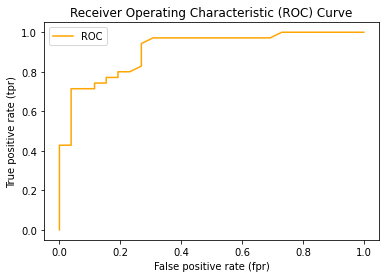

In [38]:
# Create a function for plotting ROC curves
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC curve given the false positive rate (fpr)
    and true positive rate (tpr) of a model.
    """
    # Plot roc curve
    plt.plot(fpr, tpr, color="orange", label="ROC")
    # Plot line with no predictive power (baseline)
    #plt.plot([0, 1], [0, 1], color="darkblue", linestyle="--", label="Guessing")
    
    # Customize the plot
    plt.xlabel("False positive rate (fpr)")
    plt.ylabel("True positive rate (tpr)")
    plt.title("Receiver Operating Characteristic (ROC) Curve")
    plt.legend()
    plt.show()

plot_roc_curve(fpr, tpr)

In [39]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probs_positive)

0.9093406593406593

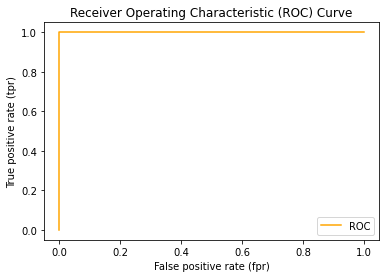

In [40]:
# Plot perfect ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_test)
plot_roc_curve(fpr, tpr)

In [41]:
# Perfect AUC score
roc_auc_score(y_test, y_test)

1.0

**Confusion Matrix**

The next way to evaluate a classification model is by using a confusion matrix.

A confusion matrix is a quick way to compare the labels a model predicts and the actual labels it was supposed to predict. In essence, giving you an idea of where the model is getting confused.

In [42]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(X_test)

pd.DataFrame(confusion_matrix(y_test, y_preds))

,0,1
0,21,5
1,8,27


In [43]:
# One way to do it is with `pd.crosstab()`.

pd.crosstab(y_test, 
            y_preds, 
            rownames=["Actual Label"], 
            colnames=["Predicted Label"])

Predicted Label,0,1
Actual Label,,
0,21,5
1,8,27


In [ ]:
# how to install a package
import sys
!conda install --yes --prefix {sys.prefix} seaborn

In [ ]:
import seaborn as sns

sns.set(font_scale = 1.5)

conf_mat = confusion_matrix(y_test, y_preds)

sns.heatmap(conf_mat)

**Confusion Matrix Updated**

The next way to evaluate a classification model is by using a confusion matrix.

A confusion matrix is a quick way to compare the labels a model predicts and the actual labels it was supposed to predict. In essence, giving you an idea of where the model is getting confused.

In [44]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(X_test)

confusion_matrix(y_test, y_preds)

array([[21,  5],
       [ 8, 27]], dtype=int64)

In [45]:
pd.crosstab(y_test, 
            y_preds, 
            rownames=["Actual Label"], 
            colnames=["Predicted Label"])

Predicted Label,0,1
Actual Label,,
0,21,5
1,8,27


### Creating a confusion matrix using Scikit-Learn

Scikit-Learn has multiple different implementations of plotting confusion matrices:

sklearn.metrics.ConfusionMatrixDisplay.from_estimator(estimator, X, y) - this takes a fitted estimator (like our clf model), features (X) and labels (y), it then uses the trained estimator to make predictions on X and compares the predictions to y by displaying a confusion matrix.
sklearn.metrics.ConfusionMatrixDisplay.from_predictions(y_true, y_pred) - this takes truth labels and predicted labels and compares them by displaying a confusion matrix.
Note: Both of these methods/classes require Scikit-Learn 1.0+. To check your version of Scikit-Learn run:

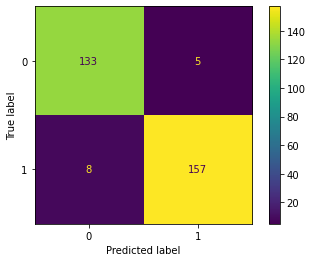

In [46]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(estimator=clf, X=X, y=y);

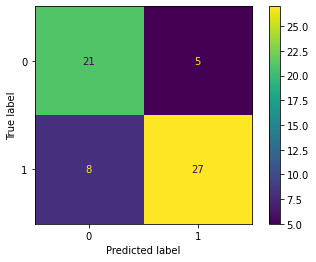

In [47]:
# Plot confusion matrix from predictions
ConfusionMatrixDisplay.from_predictions(y_true=y_test, 
                                        y_pred=y_preds);

**Classification Report**

In [48]:
from sklearn.metrics import classification_report


print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.72      0.81      0.76        26
           1       0.84      0.77      0.81        35

    accuracy                           0.79        61
   macro avg       0.78      0.79      0.78        61
weighted avg       0.79      0.79      0.79        61



In [49]:
# Where precision and recall become valuable
disease_true = np.zeros(10000)
disease_true[0] = 1 # only one positive case

disease_preds = np.zeros(10000) # model predicts every case as 0

pd.DataFrame(classification_report(disease_true,
                                   disease_preds,
                                   output_dict=True,
                                   zero_division=0))

,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


To summarize classification metrics:

* Accuracy is a good measure to start with if all classes are balanced (e.g. same amount of samples which are labelled with 0 or 1).
* Precision and recall become more important when classes are imbalanced.
* If false positive predictions are worse than false negatives, aim for higher precision.
* If false negative predictions are worse than false positives, aim for higher recall.
* F1-score is a combination of precision and recall.

### 4.2.2 Regression evaluation metrics

Model evaluation metrics documentation - https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics

The ones we're going to cover are:

* R^2 (pronounced r-squared) or coefficient of determination
* Mean absolute error (MAE)
* Mean squared error (MSE)

In [50]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = housing_df.drop("MedHouseVal", axis=1)
y = housing_df["MedHouseVal"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train)

NameError: name 'housing_df' is not defined

In [51]:
model.score(X_test, y_test)

C:\Users\Casper\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- age
- ca
- chol
- cp
- exang
- ...
Feature names seen at fit time, yet now missing:
- Colour
- Doors
- Make
- Odometer (KM)

  warnings.warn(message, FutureWarning)


AttributeError: 'RandomForestRegressor' object has no attribute 'n_outputs_'

In [52]:
from sklearn.metrics import r2_score

# Fill an array with y_test mean
y_test_mean = np.full(len(y_test), y_test.mean())

In [53]:
y_test_mean[:10]

array([0.57377049, 0.57377049, 0.57377049, 0.57377049, 0.57377049,
       0.57377049, 0.57377049, 0.57377049, 0.57377049, 0.57377049])

In [54]:
r2_score(y_true = y_test, y_pred = y_test_mean)

0.0

In [55]:
r2_score(y_true = y_test, y_pred = y_test)

1.0

**Mean absolute error (MAE)**

MAE is the average of absolute differences between predictions and actual values.

It gives us an idea of how wrong our predictions are.

In [56]:
# MAE

from sklearn.metrics import mean_absolute_error

y_preds = model.predict(X_test)

C:\Users\Casper\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- age
- ca
- chol
- cp
- exang
- ...
Feature names seen at fit time, yet now missing:
- Colour
- Doors
- Make
- Odometer (KM)

  warnings.warn(message, FutureWarning)


AttributeError: 'RandomForestRegressor' object has no attribute 'n_outputs_'

In [57]:
mae = mean_absolute_error(y_test, y_preds)
mae

0.21311475409836064

In [58]:
df = pd.DataFrame(data=  {"actual values": y_test, "predicted values": y_preds})
df["differences"] = df["predicted values"] - df["actual values"]

In [59]:
df[:10]

,actual values,predicted values,differences
213,0,0,0
140,1,1,0
15,1,1,0
202,0,0,0
88,1,1,0
162,1,1,0
280,0,0,0
107,1,1,0
59,1,0,-1
256,0,0,0


In [60]:
df["differences"].mean()

-0.04918032786885246

In [61]:
# MAE = average of the absolute value of the differences 
np.abs(df["differences"]).mean()

0.21311475409836064

**Mean squared error (MSE)**

MSE is the mean of the square of the errors between actual and predicted values.

In [62]:
# Mean squared error

from sklearn.metrics import mean_squared_error

y_preds = model.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
mse

C:\Users\Casper\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- age
- ca
- chol
- cp
- exang
- ...
Feature names seen at fit time, yet now missing:
- Colour
- Doors
- Make
- Odometer (KM)

  warnings.warn(message, FutureWarning)


AttributeError: 'RandomForestRegressor' object has no attribute 'n_outputs_'

In [63]:
df["squared differences"] = np.square(df["differences"])
df[:10]

,actual values,predicted values,differences,squared differences
213,0,0,0,0
140,1,1,0,0
15,1,1,0,0
202,0,0,0,0
88,1,1,0,0
162,1,1,0,0
280,0,0,0,0
107,1,1,0,0
59,1,0,-1,1
256,0,0,0,0


In [64]:
# MSE manually

squared = np.square(df["differences"]).mean()
squared

0.21311475409836064

### 4.2.3 Finally using the `scoring ` parameter

In [65]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis = 1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier(n_estimators=100)

clf.fit(X_train, y_train)

RandomForestClassifier()

In [66]:
np.random.seed(42)

# cross-validation accuracy

cv_acc = cross_val_score(clf, X, y, scoring = None)

# Note :
#if scoring=None, esitmator's default scoring evaulation metric is used (accuracy for classifiaction models)


cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [67]:
# Cross-validated accuracy
print(f"The cross-validated accuracy is: {np.mean(cv_acc)*100:.2f}%")

The cross-validated accuracy is: 82.48%


In [68]:
np.random.seed(42)

cv_acc = cross_val_score(clf, X, y, cv=5, scoring="accuracy")
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [69]:
# Cross-validated accuracy
print(f"The cross-validated accuracy is: {np.mean(cv_acc)*100:.2f}%")

The cross-validated accuracy is: 82.48%


In [70]:
# Precision
np.random.seed(42)
cv_precision = cross_val_score(clf, X, y, cv=5, scoring="precision")
cv_precision

array([0.82352941, 0.93548387, 0.84848485, 0.79411765, 0.76315789])

In [71]:
# Cross-validated precision
print(f"The cross-validated precision is: {np.mean(cv_precision)}")

The cross-validated precision is: 0.8329547346025924


In [72]:
# Recall
np.random.seed(42)
cv_recall = cross_val_score(clf, X, y, cv=5, scoring="recall")
cv_recall

array([0.84848485, 0.87878788, 0.84848485, 0.81818182, 0.87878788])

In [73]:
# Cross-validated recall
print(f"The cross-validated recall is: {np.mean(cv_recall)}")

The cross-validated recall is: 0.8545454545454545


Let's see the `scoring` parameter being used for regression problems

In [74]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = housing_df.drop("MedHouseVal", axis=1)
y = housing_df["MedHouseVal"]

model = RandomForestRegressor(n_estimators=100)

NameError: name 'housing_df' is not defined

In [84]:
np.random.seed(42)
cv_r2 = cross_val_score(model, X, y, cv=3, scoring=None)
np.mean(cv_r2)

0.4346316105039545

In [85]:
cv_r2

array([0.46796477, 0.35751722, 0.47841285])

All scorer objects follow the convention that higher return values are better than lower return values. Thus, mean squared error is returned as negative. 

In [86]:
# Mean squared error
cv_mse = cross_val_score(model, X, y, cv=5, scoring="neg_mean_squared_error")
np.mean(cv_mse)

-0.13025922404371587

In [87]:
cv_mse

array([-0.115     , -0.1312082 , -0.13752459, -0.16019833, -0.107365  ])

In [88]:
# # Mean absolute error
cv_mae = cross_val_score(model, X, y, cv=5, scoring="neg_mean_absolute_error")
np.mean(cv_mae)

-0.2641584699453552

In [89]:
cv_mae

array([-0.23803279, -0.26196721, -0.26245902, -0.322     , -0.23633333])

### 4.3 Using different evaluation metrics as Scikit-Learn functions


The 3rd way to evaluate scikit-learn machine learning models/estimators is to using the `sklearn.metrics` module 

In [90]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)

# Create X & y
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create model
clf = RandomForestClassifier()

# Fit model
clf.fit(X_train, y_train)

# Make predictions
y_preds = clf.predict(X_test)

# Evaluate model using evaluation functions
print("Classifier metrics on the test set")
print(f"Accurracy: {accuracy_score(y_test, y_preds)*100:.2f}%")
print(f"Precision: {precision_score(y_test, y_preds)}")
print(f"Recall: {recall_score(y_test, y_preds)}")
print(f"F1: {f1_score(y_test, y_preds)}")

Classifier metrics on the test set
Accurracy: 85.25%
Precision: 0.8484848484848485
Recall: 0.875
F1: 0.8615384615384615


In [91]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(42)

# Create X & y
X = housing_df.drop("MedHouseVal", axis=1)
y = housing_df["MedHouseVal"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create model
model = RandomForestRegressor()

# Fit model
model.fit(X_train, y_train)

# Make predictions
y_preds = model.predict(X_test)

# Evaluate model using evaluation functions
print("Regression metrics on the test set")
print(f"R2 score: {r2_score(y_test, y_preds)}")
print(f"MAE: {mean_absolute_error(y_test, y_preds)}")
print(f"MSE: {mean_squared_error(y_test, y_preds)}")

NameError: name 'housing_df' is not defined

## 5. Improving a model

First predictions = baseline predictions.
First model = baseline model.

From a data perspective :

* Could we get more data?
* Could we improve our data?

From a model perspective:

* Is there a better model we could use?
* Could we improve the current model?

Hyperparameters vs. Parameters

* Parameters = model find these patterns in data
* Hyperparameters = settings on a model we can adjust to (potentially) improve its ability to find patterns

Three ways to adjust hyperparameters:

* By hand
* Randomly with RandomSearchCV
* Exhaustively with GridSearchCV

In [111]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

In [112]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### 5.1 Tuning Hyperparameters by hand

Let's make 3 sets, training, validation and test.

In [113]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

We're going to try and adjust:

* `max_depth`
* `max_features`
* `min_samples_leaf`
* `min_samples_split`
* `n_estimators`

In [114]:
def evaluate_preds(y_true, y_preds):
    """
    Performs evaluation comparison on y_true labels vs. y_pred labels
    on a classification.
    """
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    metric_dict = {"accuracy": round(accuracy, 2),
                   "precision": round(precision, 2),
                   "recall": round(recall, 2),
                   "f1": round(f1, 2)}
    print(f"Acc: {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 score: {f1:.2f}")
    
    return metric_dict

In [115]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# Shuffle the data
heart_disease_shuffled = heart_disease.sample(frac=1)

# Split into X & y
X = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

# Split the data into train, validation & test sets
train_split = round(0.7 * len(heart_disease_shuffled)) # 70% of data
valid_split = round(train_split + 0.15 * len(heart_disease_shuffled)) # 15% of data
X_train, y_train = X[:train_split], y[:train_split]
X_valid, y_valid = X[train_split:valid_split], y[train_split:valid_split]
X_test, y_test = X[valid_split:], y[:valid_split]

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Make baseline predictions
y_preds = clf.predict(X_valid)

# Evaluate the classifier on validation set
baseline_metrics = evaluate_preds(y_valid, y_preds)
baseline_metrics


Acc: 82.22%
Precision: 0.81
Recall: 0.88
F1 score: 0.85


{'accuracy': 0.82, 'precision': 0.81, 'recall': 0.88, 'f1': 0.85}

In [116]:
np.random.seed(42)

# Create a second classifier with different hyperparameters
clf_2 = RandomForestClassifier(n_estimators=100)
clf_2.fit(X_train, y_train)

# Make predictions with different hyperparameters
y_preds_2 = clf_2.predict(X_valid)

# Evalute the 2nd classsifier
clf_2_metrics = evaluate_preds(y_valid, y_preds_2)

Acc: 82.22%
Precision: 0.84
Recall: 0.84
F1 score: 0.84


## 5.2 Hyperparameter tuning with RandomizedSearchCV

In [117]:
from sklearn.model_selection import RandomizedSearchCV

grid = {"n_estimators": [10, 100, 200, 500, 1000, 1200],
        "max_depth": [None, 5, 10, 20, 30],
        "max_features": ["auto", "sqrt"],
        "min_samples_split": [2, 4, 6],
        "min_samples_leaf": [1, 2, 4]}

np.random.seed(42)

# Split into X & y
X = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate RandomForestClassifier
clf = RandomForestClassifier(n_jobs=1)

# Setup RandomizedSearchCV
rs_clf = RandomizedSearchCV(estimator=clf,
                            param_distributions=grid, 
                            n_iter=10, # number of models to try
                            cv=5,
                            verbose=2)

# Fit the RandomizedSearchCV version of clf
rs_clf.fit(X_train, y_train);

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.2s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.2s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.2s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.2s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.2s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100

In [118]:
rs_clf.best_params_

{'n_estimators': 200,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': None}

In [119]:
# Make predictions with the best hyperparameters
rs_y_preds = rs_clf.predict(X_test)

# Evaluate the predictions
rs_metrics = evaluate_preds(y_test, rs_y_preds)

Acc: 81.97%
Precision: 0.77
Recall: 0.86
F1 score: 0.81


### 5.3 Hyperparameter tuning with GridSearchCV

In [120]:
grid

{'n_estimators': [10, 100, 200, 500, 1000, 1200],
 'max_depth': [None, 5, 10, 20, 30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [2, 4, 6],
 'min_samples_leaf': [1, 2, 4]}

In [121]:
grid_2 = {'n_estimators': [100, 200, 500],
           'max_depth': [None],
           'max_features': ['auto', 'sqrt'],
           'min_samples_split': [6],
           'min_samples_leaf': [1, 2]}

In [122]:
from sklearn.model_selection import GridSearchCV, train_test_split

np.random.seed(42)

# Split into X & y
X = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate RandomForestClassifier
clf = RandomForestClassifier(n_jobs=1)

# Setup GridSearchCV
gs_clf = GridSearchCV(estimator=clf,
                      param_grid=grid_2, 
                      cv=5,
                      verbose=2)

# Fit the RandomizedSearchCV version of clf
gs_clf.fit(X_train, y_train);

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, 

In [123]:
# Check the best hyperparameters found with GridSearchCV
gs_clf.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 200}

In [124]:
# Max predictions with the GridSearchCV classifier
gs_y_preds = gs_clf.predict(X_test)

# Evaluate the predictions
gs_metrics = evaluate_preds(y_test, gs_y_preds)

Acc: 78.69%
Precision: 0.74
Recall: 0.82
F1 score: 0.78


Let's create a DataFrame to compare the different metrics.

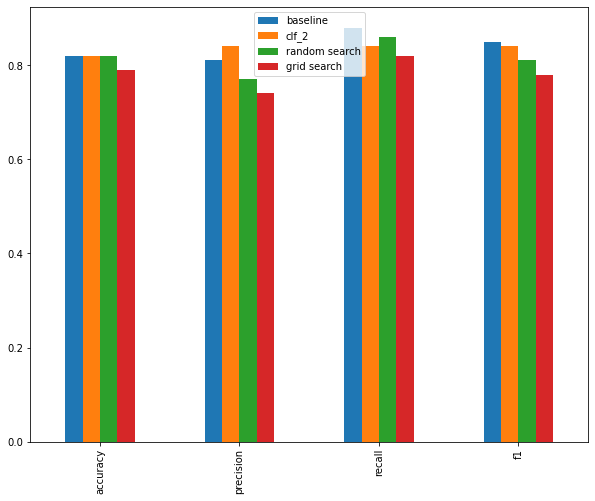

In [125]:
compare_metrics = pd.DataFrame({"baseline": baseline_metrics,
                                "clf_2": clf_2_metrics,
                                "random search": rs_metrics,
                                "grid search": gs_metrics})
compare_metrics.plot.bar(figsize=(10, 8));

It seems, even after trying 72 different combinations of hyperparamters, we don't get an improvement in results.

These things might happen. But it's important to remember, it's not over. There may be more we can do.

In a hyperparameter tuning sense, there may be a better set we could find through more extensive searching with RandomizedSearchCV and GridSearchCV but it's likely these improvements will be marginal.

A few next ideas we could try:

* Collecting more data - Based on the results our models are getting now, it seems like they're finding some patterns. Collecting more data may improve a models ability to find patterns. However, our ability to do this will largely depend on the project we're working on.
* Try a more advanced model - Although our tuned Random Forest model is doing pretty well, a more advanced ensemble method such as XGBoost or CatBoost might perform better.
Since machine learning is part engineering, part science, these kind of experiments are common place in any machine learning project.

Now we have got a somewhat tuned Random Forest model, the next thing we might want to do is export it and save it so we could share it with our team or use it in an application without having to retrain it.

## 6. Saving and loading a trained machine learning model

We'll use pickle's dump() function and pass it our model, gs_clf, along with the open() function containing a string for the filename we want to save our model as, along with the "wb" string which stands for "write binary", which is the file type open() will write our model as.

Two ways to do it:

* With the Python's `pickle` module
* With the `joblib` module

**Pickle**

In [128]:
import pickle

# Save an existing model to file
pickle.dump(gs_clf, open("random_forest_model_1.pkl", "wb"))

In [129]:
# Load a saved model and make a prediction
loaded_model = pickle.load(open("random_forest_model_1.pkl", "rb"))
loaded_model.score(X_test, y_test)

0.7868852459016393

In [130]:
# Making some predictions

pickle_y_preds = loaded_model.predict(X_test)
evaluate_preds(y_test, pickle_y_preds)

Acc: 78.69%
Precision: 0.74
Recall: 0.82
F1 score: 0.78


{'accuracy': 0.79, 'precision': 0.74, 'recall': 0.82, 'f1': 0.78}

**Joblib**

In [131]:
from joblib import dump, load

# Save a model to file

dump(gs_clf, filename="gs_random_forest_model_1.joblib") 

['gs_random_forest_model_1.joblib']

In [132]:
# Import a saved joblib model
loaded_joblib_model = load(filename="gs_random_forest_model_1.joblib")

In [133]:
# Make and evaluate joblib predictions 
joblib_y_preds = loaded_joblib_model.predict(X_test)
evaluate_preds(y_test, joblib_y_preds)

Acc: 78.69%
Precision: 0.74
Recall: 0.82
F1 score: 0.78


{'accuracy': 0.79, 'precision': 0.74, 'recall': 0.82, 'f1': 0.78}

Which one should we use, `pickle` or `joblib`?

According to Scikit-Learn's documentation, they suggest it may be more efficient to use `joblib` as it's more efficient with large numpy array (which is what may be contained in trained/fitted Scikit-Learn models).

## 7. Putting it all together

To tidy things up, we'll be using Scikit-Learn's Pipeline class. You can imagine Pipeline as being a way to string a number of different Scikit-Learn processes together.

In [136]:
data = pd.read_csv("car-sales-extended-missing-data.csv")
data.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [137]:
data.dtypes

Make              object
Colour            object
Odometer (KM)    float64
Doors            float64
Price            float64
dtype: object

In [139]:
data.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In our case, you could think of the steps as:

1. Fill missing data
2. Convert data to numbers
3. Build a model on the data
4. Let's do it.

In [142]:
# Getting data ready

import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Modeling 

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV

# Setup random seed

import numpy as np
np.random.seed(42)

# Import the data and drop the rows with missing labels

data = pd.read_csv("car-sales-extended-missing-data.csv")
data.dropna(subset=["Price"], inplace = True)

# Define different features and transformer pipelines

categorical_features = ["Make", "Colour"]
categorical_transformer = Pipeline(steps=[("imputer", SimpleImputer(strategy="constant", fill_value="missing")),
                                           ("onehot", OneHotEncoder(handle_unknown="ignore"))])

door_features = ["Doors"]
door_transformer = Pipeline(steps=[("imputer", SimpleImputer(strategy="constant", fill_value=4))])

numeric_features = ["Odometer (KM)"]
numeric_transformer = Pipeline(steps=[("imputer", SimpleImputer(strategy="mean"))])

# Setup preprocessing steps (fill missing values, then convert to numbers)

preprocesser = ColumnTransformer(transformers=[("cat", categorical_transformer, categorical_features ),
                                               ("door", door_transformer, door_features),
                                               ("num", numeric_transformer, numeric_features)])

# Create a preprocessing and modelling pipeline

model = Pipeline(steps=[("preprocessor", preprocesser),
                        ("model", RandomForestRegressor())])

# Split data
X = data.drop("Price", axis=1)
y = data["Price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Fit and score the model
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.22188417408787875

What we've done is combine a series of data preprocessing steps (filling missing values, encoding numerical values) as well as a model into a `Pipeline()`.

Doing so not only cleans up the code, it ensures the same steps are taken every time the code is run rather than having multiple different processing steps happening in different stages.

It's also possible to GridSearchCV or RandomizedSearchCV with a Pipeline.

The main difference is when creating a hyperparameter grid, you have to add a prefix to each hyperparameter.

The prefix is the name of the Pipeline step you'd like to alter, followed by two underscores.

For example, to adjust n_estimators of "model" in the Pipeline, you'd use: "model__n_estimators".

Let's see it.

In [143]:
# Using grid search with pipeline
pipe_grid = {
    "preprocessor__num__imputer__strategy": ["mean", "median"],
    "model__n_estimators": [100, 1000],
    "model__max_depth": [None, 5],
    "model__max_features": ["auto", "sqrt"],
    "model__min_samples_split": [2, 4]
}

gs_model = GridSearchCV(model, pipe_grid, cv=5, verbose=2)
gs_model.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samp

[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean; total time=   1.6s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean; total time=   2.0s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=1000, preprocessor__n

[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median; total time=   1.1s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median; total time=   1.1s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median; total time=   1.1s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median; total time=   1.1s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median; total time=   1.1s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer_

[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value='missing',
                                                                                                        strategy='constant')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Make',
                                                                          'Colour']),
                                                                        ('door',
         

In [146]:
# Score the best model
gs_model.score(X_test, y_test)

0.2886531011595892